In [ ]:
# Part 1: Detecting Data Drift in AI/ML Models
# Objective: Understand data drift, how it affects machine learning models, and techniques tomonitor it.

# Task 1: Understanding Data Drift: Study a historical dataset used in training a simple linear regression model and
# compare it with recent unseen data to detect drift.

# Task 2: Monitoring Distribution Changes: Write the code to identify features that exhibit statistical distribution differences.

# Task 3: Visualizing Data Drift: Use visualization techniques to illustrate data drift.






In [ ]:
# Part 2: Automating Data Quality Checks
# Objective: Use Python and data quality frameworks to automate validation.

# Task 1: Setting Up Automated Validation with Python

# Task 2: Introduction to Great Expectations: Install the great_expectations package and set up a basic project.

# Task 3: Creating Expectations with Great Expectations: Use Great Expectations to define data validation expectations for a dataset.





--- Part 1: Detecting Data Drift in AI/ML Models ---

--- Task 1: Understanding Data Drift ---
Mean Squared Error on recent unseen data: 40.4711
Mean Squared Error on historical training data: 3.2263

Observation: The higher MSE on the recent data suggests potential data drift affecting the model's performance.

--- Task 2: Monitoring Distribution Changes ---
Feature: feature
  Historical Data - Mean: 4.7018, Std: 2.9749
  Recent Data     - Mean: 10.5214, Std: 3.6993
  KS Statistic: 0.5700, P-value: 0.0000
  Significant distribution difference detected (p < 0.05).
Feature: target
  Historical Data - Mean: 9.4015, Std: 5.9564
  Recent Data     - Mean: 26.1480, Std: 7.7803
  KS Statistic: 0.7700, P-value: 0.0000
  Significant distribution difference detected (p < 0.05).

--- Task 3: Visualizing Data Drift ---


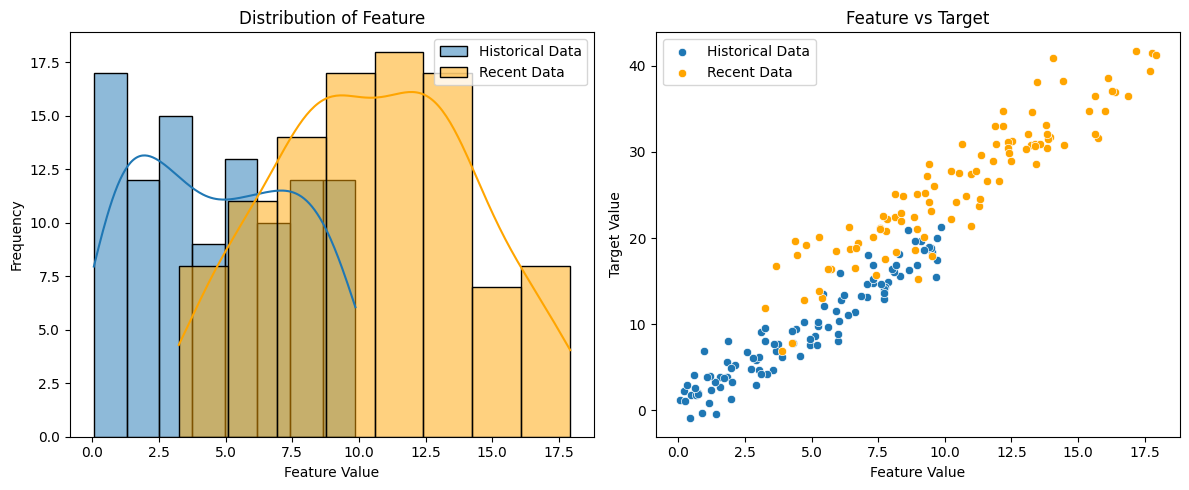

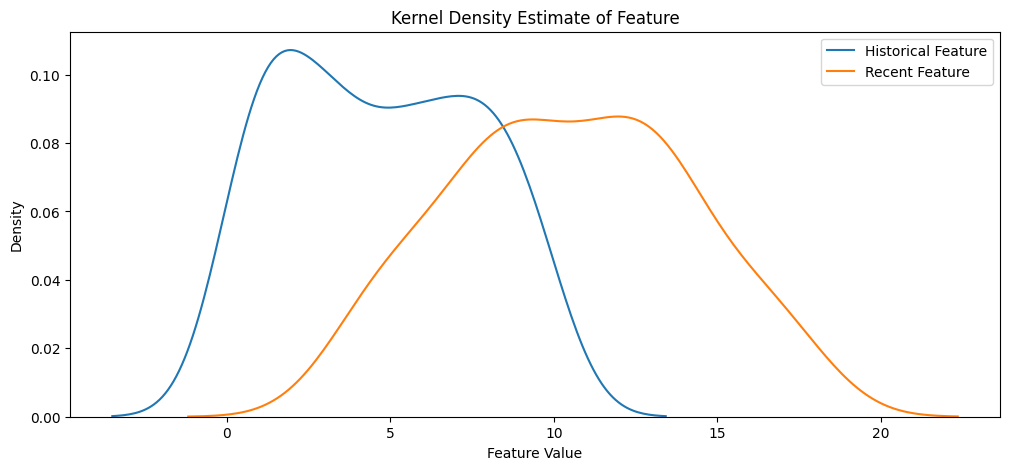

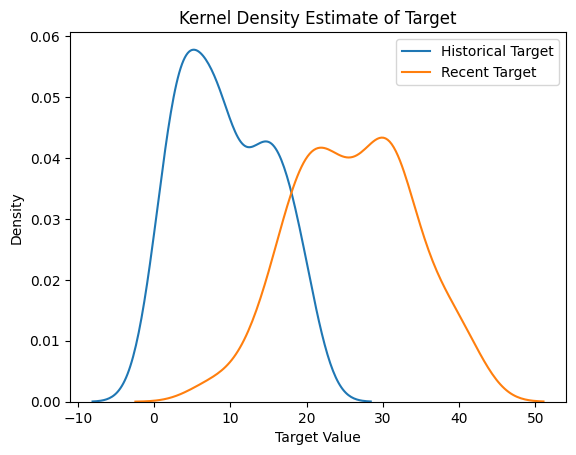


Observation: The visualizations clearly show the shift in the distribution of the 'feature' and 'target' in the recent data compared to the historical data.

--- Part 2: Automating Data Quality Checks ---

--- Task 1: Setting Up Automated Validation with Python ---

Running automated data quality checks:
Validation Passed: Column 'ID' has no missing values.
Validation Failed: Column 'value' has 1 missing values.
Validation Passed: Column 'value' has the expected data type 'float64'.
Validation Failed: Column 'category' has invalid values: ['D'].
Validation Passed: Column 'date' has the expected data type 'object'.

--- Task 2: Introduction to Great Expectations ---
Assuming you have Great Expectations installed. If not, run: `pip install great_expectations`

To initialize Great Expectations in your project, you would typically run the following command in your terminal within your project directory:
`great_expectations init`

This command sets up the necessary directories and configur

AttributeError: 'EphemeralDataContext' object has no attribute 'add_pandas'

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
import great_expectations as ge

# --- Part 1: Detecting Data Drift in AI/ML Models ---

print("\n--- Part 1: Detecting Data Drift in AI/ML Models ---")

# --- Task 1: Understanding Data Drift ---
print("\n--- Task 1: Understanding Data Drift ---")

# Generate historical training data
np.random.seed(42)
n_samples = 100
historical_feature = np.random.rand(n_samples) * 10
historical_target = 2 * historical_feature + np.random.normal(0, 2, n_samples)
historical_data = pd.DataFrame({'feature': historical_feature, 'target': historical_target})

# Train a simple linear regression model
model = LinearRegression()
model.fit(historical_data[['feature']], historical_data['target'])

# Generate recent unseen data with potential drift
np.random.seed(123)
n_new_samples = 100
recent_feature = np.random.rand(n_new_samples) * 15 + 3  # Shifted and wider range
recent_target = 2 * recent_feature + np.random.normal(0, 3, n_new_samples) + 5 # Shifted noise
recent_data = pd.DataFrame({'feature': recent_feature, 'target': recent_target})

# Evaluate the model on the recent data
predictions_recent = model.predict(recent_data[['feature']])
mse_recent = mean_squared_error(recent_data['target'], predictions_recent)
print(f"Mean Squared Error on recent unseen data: {mse_recent:.4f}")

predictions_historical = model.predict(historical_data[['feature']])
mse_historical = mean_squared_error(historical_data['target'], predictions_historical)
print(f"Mean Squared Error on historical training data: {mse_historical:.4f}")

print("\nObservation: The higher MSE on the recent data suggests potential data drift affecting the model's performance.")

# --- Task 2: Monitoring Distribution Changes ---
print("\n--- Task 2: Monitoring Distribution Changes ---")

def monitor_distribution_changes(df1, df2, column):
    """
    Calculates and compares mean and standard deviation of a feature in two datasets.
    Performs Kolmogorov-Smirnov test to check for distribution difference.
    """
    mean1 = df1[column].mean()
    std1 = df1[column].std()
    mean2 = df2[column].mean()
    std2 = df2[column].std()
    ks_statistic, p_value = kstest(df1[column], df2[column])

    print(f"Feature: {column}")
    print(f"  Historical Data - Mean: {mean1:.4f}, Std: {std1:.4f}")
    print(f"  Recent Data     - Mean: {mean2:.4f}, Std: {std2:.4f}")
    print(f"  KS Statistic: {ks_statistic:.4f}, P-value: {p_value:.4f}")

    alpha = 0.05
    if p_value < alpha:
        print(f"  Significant distribution difference detected (p < {alpha}).")
        return True
    else:
        print(f"  No significant distribution difference detected (p >= {alpha}).")
        return False

# Monitor distribution changes for the 'feature' column
drift_detected = monitor_distribution_changes(historical_data, recent_data, 'feature')

# Monitor distribution changes for the 'target' column
drift_detected_target = monitor_distribution_changes(historical_data, recent_data, 'target')

# --- Task 3: Visualizing Data Drift ---
print("\n--- Task 3: Visualizing Data Drift ---")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(historical_data['feature'], label='Historical Data', kde=True)
sns.histplot(recent_data['feature'], color='orange', label='Recent Data', kde=True)
plt.title('Distribution of Feature')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x='feature', y='target', data=historical_data, label='Historical Data')
sns.scatterplot(x='feature', y='target', data=recent_data, color='orange', label='Recent Data')
plt.title('Feature vs Target')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.kdeplot(historical_data['feature'], label='Historical Feature')
sns.kdeplot(recent_data['feature'], label='Recent Feature')
plt.title('Kernel Density Estimate of Feature')
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.legend()
plt.show()

sns.kdeplot(historical_data['target'], label='Historical Target')
sns.kdeplot(recent_data['target'], label='Recent Target')
plt.title('Kernel Density Estimate of Target')
plt.xlabel('Target Value')
plt.ylabel('Density')
plt.legend()
plt.show()

print("\nObservation: The visualizations clearly show the shift in the distribution of the 'feature' and 'target' in the recent data compared to the historical data.")

# --- Part 2: Automating Data Quality Checks ---

print("\n--- Part 2: Automating Data Quality Checks ---")

# Sample data for data quality checks
data_quality = pd.DataFrame({
    'ID': [1, 2, 3, 4, 5],
    'value': [10, 20, None, 40, 50],
    'category': ['A', 'B', 'A', 'D', 'B'],
    'date': ['2023-01-01', '2023-01-02', '2023-01-03', None, '2023-01-05']
})

# --- Task 1: Setting Up Automated Validation with Python ---
print("\n--- Task 1: Setting Up Automated Validation with Python ---")

def check_not_null(df, column):
    null_count = df[column].isnull().sum()
    if null_count > 0:
        print(f"Validation Failed: Column '{column}' has {null_count} missing values.")
        return False
    else:
        print(f"Validation Passed: Column '{column}' has no missing values.")
        return True

def check_data_type(df, column, expected_type):
    if df[column].dtype == expected_type:
        print(f"Validation Passed: Column '{column}' has the expected data type '{expected_type}'.")
        return True
    else:
        print(f"Validation Failed: Column '{column}' has data type '{df[column].dtype}', expected '{expected_type}'.")
        return False

def check_value_in_set(df, column, allowed_values):
    invalid_values = df[column][~df[column].isin(allowed_values)].unique()
    if len(invalid_values) > 0:
        print(f"Validation Failed: Column '{column}' has invalid values: {invalid_values}.")
        return False
    else:
        print(f"Validation Passed: Column '{column}' values are within the allowed set: {allowed_values}.")
        return True

def run_data_quality_checks(df):
    print("\nRunning automated data quality checks:")
    check_not_null(df, 'ID')
    check_not_null(df, 'value')
    check_data_type(df, 'value', 'float64') # Note: NaN makes integer columns float
    check_value_in_set(df, 'category', ['A', 'B', 'C'])
    check_data_type(df, 'date', 'object') # Pandas usually reads dates as object by default

run_data_quality_checks(data_quality.copy()) # Use a copy to avoid modifying the original

# --- Task 2: Introduction to Great Expectations ---
print("\n--- Task 2: Introduction to Great Expectations ---")

print("Assuming you have Great Expectations installed. If not, run: `pip install great_expectations`")
print("\nTo initialize Great Expectations in your project, you would typically run the following command in your terminal within your project directory:")
print("`great_expectations init`")
print("\nThis command sets up the necessary directories and configuration files for Great Expectations.")

# For programmatic interaction (as done below), the initialization might have been done previously.

# --- Task 3: Creating Expectations with Great Expectations ---
print("\n--- Task 3: Creating Expectations with Great Expectations ---")

# Get a Great Expectations context
context = ge.get_context()

# Create a Pandas data source if it doesn't exist
datasource_name = "my_pandas_datasource"
if datasource_name not in context.list_datasources():
    context.add_pandas(name=datasource_name, batch_kwargs_generators=None)
    print(f"Pandas Datasource '{datasource_name}' created.")

# Create a BatchRequest for our DataFrame
batch_request = context.get_validator(
    batch_request=ge.core.batch.BatchRequest(
        datasource_name=datasource_name,
        data_asset_name="my_data",  # You can name your data asset
        batch_spec_passthrough={"dataframe": data_quality.copy()},
    ),
    expectation_suite_name="data_quality_suite",
)

# Define expectations
batch_request.expect_column_to_not_have_missing_values("ID")
batch_request.expect_column_to_not_have_missing_values("value")
batch_request.expect_column_values_to_be_in_type_list("value", ["float64", "Int64"]) # Handle potential NaN making it float
batch_request.expect_column_values_to_be_in_set("category", ["A", "B", "C"])
batch_request.expect_column_to_not_have_missing_values("date") # Expecting no missing dates for this example

# Run the validation
print("\nRunning Great Expectations validation:")
validation_result = batch_request.validate()
print(validation_result)

if not validation_result["success"]:
    print("\nGreat Expectations found data quality issues.")
else:
    print("\nGreat Expectations validation passed.")

# You can also save the expectation suite for future use:
# batch_request.save_expectation_suite()
# print("\nExpectation suite 'data_quality_suite' saved.")